<a href="https://colab.research.google.com/github/AIKevin/machine_learning_with_python/blob/master/discriminant_analysis_pw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Discriminant Analysis
##PW4
###Sci-Kit Learn

##Introduction
In this practical work, we will compare several classification models to see the difference of performance between them.

##Table of Contents


1.   Installing Dependencies
2.   Data Loading, Preprocessing and Visualisization
3.   Logistic Regression, Prediction and Evaluation
4.   Linear Discriminant Anlaysis
5.   Quadratic Discriminant Analysis

## 1.Installig dependencies

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

##2.Data Loading, Preprocessing and Visualization

In [5]:
!git clone https://github.com/shivang98/Social-Network-ads-Boost

Cloning into 'Social-Network-ads-Boost'...
remote: Enumerating objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.


In [6]:
%%shell
cd Social-Network-ads-Boost
ls

random_forest_classification.py  README.md  Social_Network_Ads.csv


###Dataset extraction and Preprocessing

In [0]:
dataset= pd.read_csv("Social-Network-ads-Boost/Social_Network_Ads.csv")
dataset.head()
X = np.asarray(dataset[[ 'Age', 'EstimatedSalary']])
y=np.asarray(dataset["Purchased"])
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

###Dataset Visualization

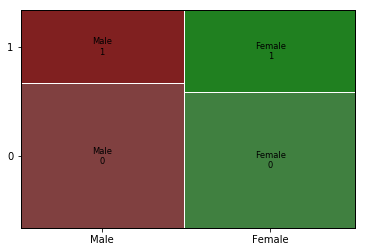

In [8]:
from statsmodels.graphics.mosaicplot import mosaic
data = pd.DataFrame({'Purchased':  np.asarray(dataset[ 'Purchased']), 'Gender':np.asarray(dataset[ 'Gender'])})
mosaic(data,["Gender","Purchased"])
plt.show()


In [9]:
data["Gender"]=pd.get_dummies(data["Gender"])
from scipy.stats import chisquare
chisquare(data[["Purchased","Gender"]])

Power_divergenceResult(statistic=array([257., 196.]), pvalue=array([1., 1.]))

### Data Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


##3.Logistic Regression, Prediction and Evaluation

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(LR)
yhat = LR.predict(X_test)
print(yhat)
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1]
[[0.6308339  0.3691661 ]
 [0.65396405 0.34603595]
 [0.67054985 0.32945015]
 [0.59162418 0.40837582]
 [0.64657917 0.35342083]
 [0.40844433 0.59155567]
 [0.41778098 0.58221902]
 [0.26243229 0.73756771]
 [0.38041539 0.61958461]
 [0.58966129 0.41033871]
 [0.57386015 0.42613985]
 [0.70683501 0.29316499]
 [0.68298024 0.31701976]
 [0.53537132 0.46462868]
 [0.55349142 0.44650858]
 [0.65125255 0.34874745]
 [0.72022093 0.27977907]
 [0.77659602 0.22340398]
 [0.73491826 0.

[[22  8]
 [ 5 65]]
Confusion matrix, without normalization
[[22  8]
 [ 5 65]]


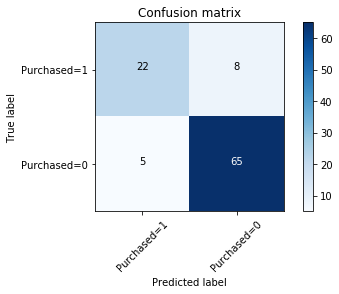

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Purchased=1','Purchased=0'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.81      0.73      0.77        30

    accuracy                           0.87       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.87      0.87      0.87       100



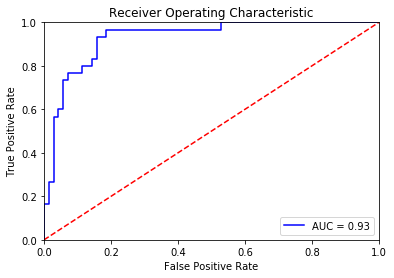

In [13]:
print (classification_report(y_test, yhat))

from sklearn.metrics import roc_curve, auc
roc_curve(y_test, yhat)


probs = yhat_prob
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##4.Linear Discriminant Analysis

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [15]:
LDA=LinearDiscriminantAnalysis(solver='svd').fit(X_train,y_train)
print(LDA)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [16]:
print(LDA.coef_)

[[2.21 1.04]]


In [17]:
print(LDA.means_)
print(LDA.priors_)


[[-0.45 -0.26]
 [ 0.84  0.48]]
[0.62 0.38]


In [18]:
yhat2=LDA.predict(X_test)
print(yhat2)

[0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1]


In [19]:
yhat_prob2 = LDA.predict_proba(X_test)
print(yhat_prob2)

[[0.91 0.09]
 [0.95 0.05]
 [0.96 0.04]
 [0.83 0.17]
 [0.94 0.06]
 [0.16 0.84]
 [0.22 0.78]
 [0.02 0.98]
 [0.13 0.87]
 [0.82 0.18]
 [0.79 0.21]
 [0.98 0.02]
 [0.97 0.03]
 [0.65 0.35]
 [0.71 0.29]
 [0.93 0.07]
 [0.98 0.02]
 [0.99 0.01]
 [0.99 0.01]
 [1.   0.  ]
 [0.87 0.13]
 [0.97 0.03]
 [0.99 0.01]
 [0.02 0.98]
 [0.57 0.43]
 [0.01 0.99]
 [0.92 0.08]
 [0.62 0.38]
 [1.   0.  ]
 [0.83 0.17]
 [0.75 0.25]
 [0.67 0.33]
 [0.99 0.01]
 [0.91 0.09]
 [0.44 0.56]
 [0.77 0.23]
 [0.08 0.92]
 [0.99 0.01]
 [0.74 0.26]
 [0.98 0.02]
 [0.42 0.58]
 [0.96 0.04]
 [1.   0.  ]
 [0.97 0.03]
 [0.65 0.35]
 [0.69 0.31]
 [0.98 0.02]
 [0.74 0.26]
 [0.27 0.73]
 [0.29 0.71]
 [0.89 0.11]
 [0.88 0.12]
 [0.78 0.22]
 [0.02 0.98]
 [0.12 0.88]
 [0.95 0.05]
 [0.41 0.59]
 [0.95 0.05]
 [0.62 0.38]
 [0.32 0.68]
 [0.13 0.87]
 [0.49 0.51]
 [0.97 0.03]
 [0.88 0.12]
 [0.94 0.06]
 [0.72 0.28]
 [0.99 0.01]
 [1.   0.  ]
 [0.3  0.7 ]
 [0.4  0.6 ]
 [0.99 0.01]
 [0.1  0.9 ]
 [0.7  0.3 ]
 [0.29 0.71]
 [0.01 0.99]
 [0.89 0.11]
 [0.57 0.43]

In [20]:
print("Confusion Matrix LR\n",confusion_matrix(y_test, yhat, labels=[1,0]))
print("Confusion Matrix LDA\n",confusion_matrix(y_test, yhat2, labels=[1,0]))

Confusion Matrix LR
 [[22  8]
 [ 5 65]]
Confusion Matrix LDA
 [[23  7]
 [ 5 65]]


In [21]:
print ("Performance LR\n",classification_report(y_test, yhat))
print ("Performance LDA\n",classification_report(y_test, yhat2))

Performance LR
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.81      0.73      0.77        30

    accuracy                           0.87       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.87      0.87      0.87       100

Performance LDA
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        70
           1       0.82      0.77      0.79        30

    accuracy                           0.88       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.88      0.88      0.88       100



Almost equal between logistic regression and linear discriminant analysis.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


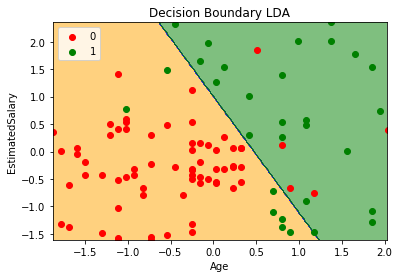

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
 
aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, LDA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision Boundary LDA')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

##5.Quadratic Discriminant Analysis

In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [24]:
QDA=QuadraticDiscriminantAnalysis().fit(X_train,y_train)
print(QDA)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [25]:
print("QDA means\n",QDA.means_)
print("QDA priors\n",QDA.priors_)

QDA means
 [[-0.45 -0.26]
 [ 0.84  0.48]]
QDA priors
 [0.62 0.38]


In [26]:
yhat3=QDA.predict(X_test)
print(yhat3)
yhat_prob3 = QDA.predict_proba(X_test)
print(yhat_prob3)

[0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1]
[[9.58e-01 4.23e-02]
 [9.58e-01 4.24e-02]
 [9.62e-01 3.77e-02]
 [8.88e-01 1.12e-01]
 [9.44e-01 5.61e-02]
 [1.34e-02 9.87e-01]
 [3.55e-01 6.45e-01]
 [1.74e-02 9.83e-01]
 [2.31e-01 7.69e-01]
 [8.87e-01 1.13e-01]
 [8.73e-01 1.27e-01]
 [9.92e-01 8.20e-03]
 [9.77e-01 2.26e-02]
 [7.62e-01 2.38e-01]
 [7.78e-01 2.22e-01]
 [9.63e-01 3.74e-02]
 [9.94e-01 5.92e-03]
 [9.97e-01 2.74e-03]
 [9.96e-01 4.15e-03]
 [9.99e-01 1.46e-03]
 [9.26e-01 7.36e-02]
 [9.87e-01 1.28e-02]
 [9.92e-01 7.70e-03]
 [4.57e-02 9.54e-01]
 [7.14e-01 2.86e-01]
 [2.55e-02 9.74e-01]
 [8.99e-01 1.01e-01]
 [7.57e-01 2.43e-01]
 [1.00e+00 4.42e-04]
 [9.06e-01 9.43e-02]
 [8.43e-01 1.57e-01]
 [3.35e-01 6.65e-01]
 [9.95e-01 4.51e-03]
 [9.44e-01 5.58e-02]
 [3.96e-01 6.04e-01]
 [8.68e-01 1.32e-01]
 [1.12e-01 8.88e-01]
 [9.97e-01 2.74e-03

In [27]:
print("Confusion Matrix QDA\n",confusion_matrix(y_test, yhat3, labels=[1,0]))

Confusion Matrix QDA
 [[27  3]
 [ 5 65]]


In [28]:
print ("Performance QDA\n",classification_report(y_test, yhat3))

Performance QDA
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        70
           1       0.84      0.90      0.87        30

    accuracy                           0.92       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


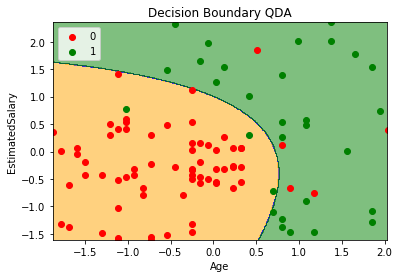

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
 
aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, QDA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision Boundary QDA')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

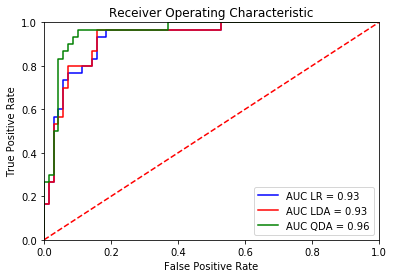

In [30]:
probs1 = yhat_prob
probs2= yhat_prob2
probs3= yhat_prob3
preds1 = probs1[:,1]
preds2 = probs2[:,1]
preds3 = probs3[:,1]
fpr1, tpr1, threshold = roc_curve(y_test, preds1)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold = roc_curve(y_test, preds2)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold = roc_curve(y_test, preds3)
roc_auc3 = auc(fpr3, tpr3)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC LR = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'AUC LDA = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'g', label = 'AUC QDA = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



The Logistic Regression and Linear Discriminant Analysis models have a similar AUC and and a similar ROC Curve.

The Quadratic Model has a higher AUC and the Roc Curve is higher. It has a better accuracy.

The 3 models are relevant because their AUC is >0.8.